# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

 ### Data Prep
 
- Import in the standard libraries (NumPy, pandas, matplotlib)
- Read in the CSV
- Explore the data set, the columns and the types

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2013_movies.csv")

In [6]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [7]:
df.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [8]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

### Exercise 1 
 
- Plot Domestic Total Gross over Time.
- Try a scatterplot and a line plot.

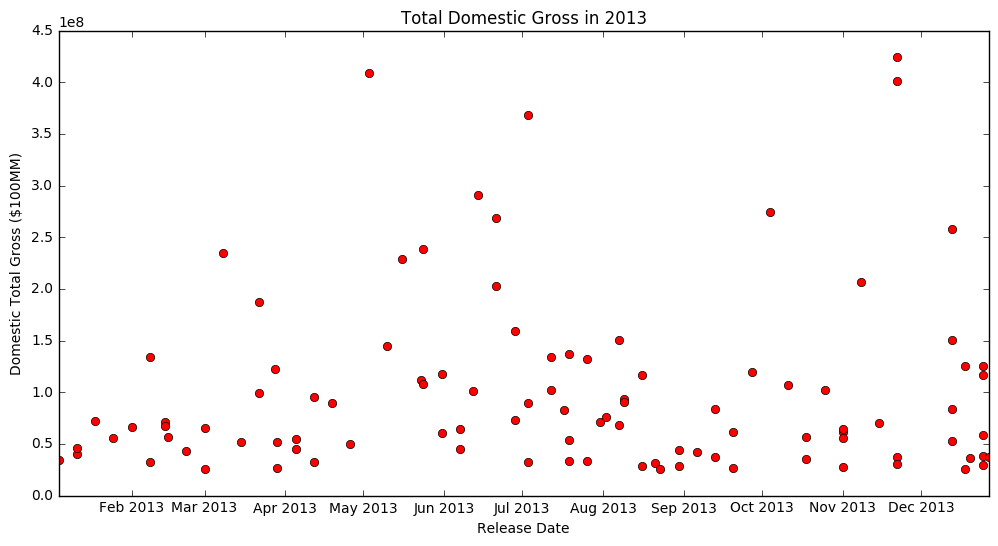

In [23]:
from datetime import datetime

# scatterplot
f = plt.figure(figsize=(12,6))
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

plt.plot(df['ReleaseDate'], df['DomesticTotalGross'], 'ro')
plt.title("Total Domestic Gross in 2013")
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross ($100MM)')



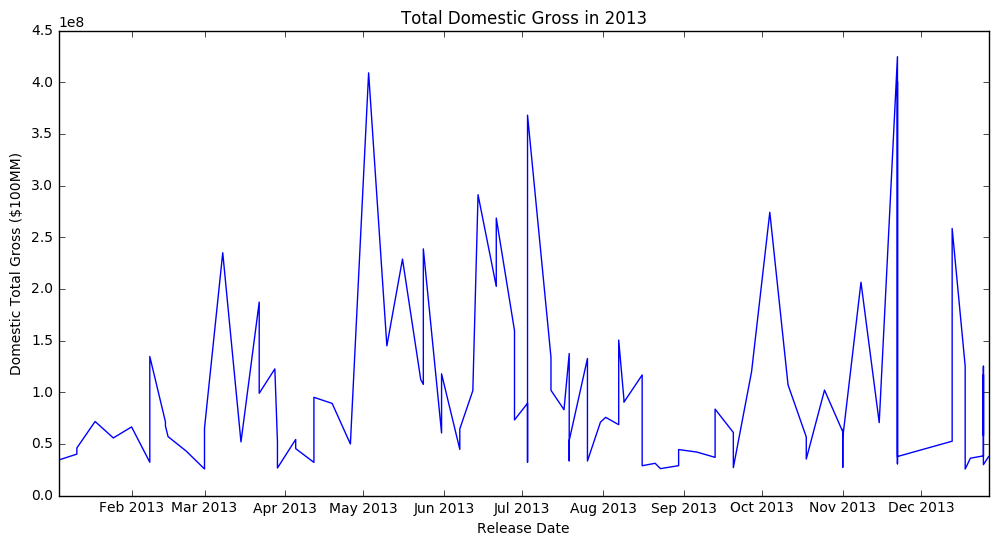

In [24]:
# line plot after sorting the datetime values
f = plt.figure(figsize=(12,6))
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df = df.sort_values(by=['ReleaseDate'])

plt.plot(df['ReleaseDate'], df['DomesticTotalGross'])
plt.title("Total Domestic Gross in 2013")
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross ($100MM)')



### Exercise 2

- Plot Runtime vs. Domestic Total Gross. 
- Try a scatterplot and a line plot.

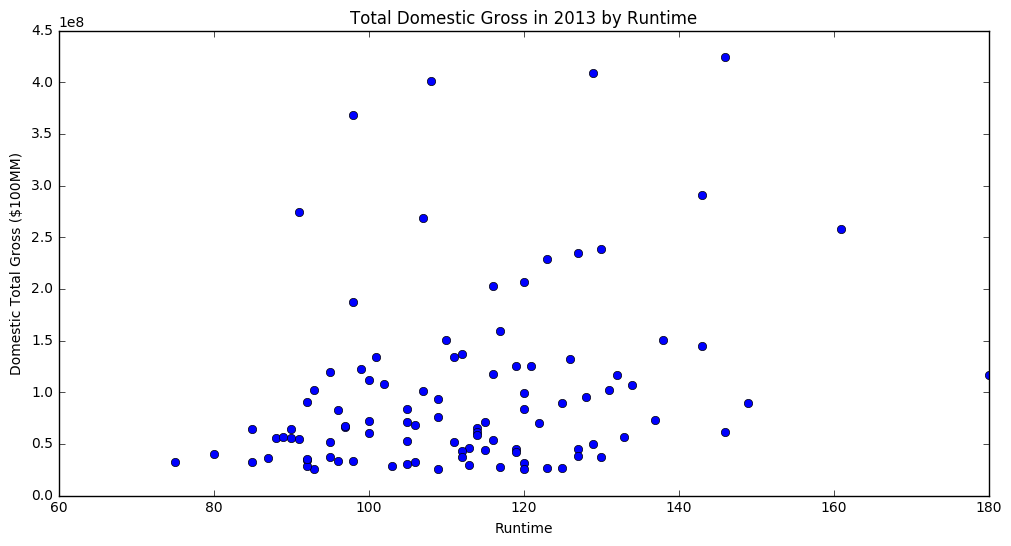

In [25]:
f = plt.figure(figsize=(12,6))

plt.plot(df['Runtime'], df['DomesticTotalGross'], 'bo')
plt.title('Total Domestic Gross in 2013 by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross ($100MM)')

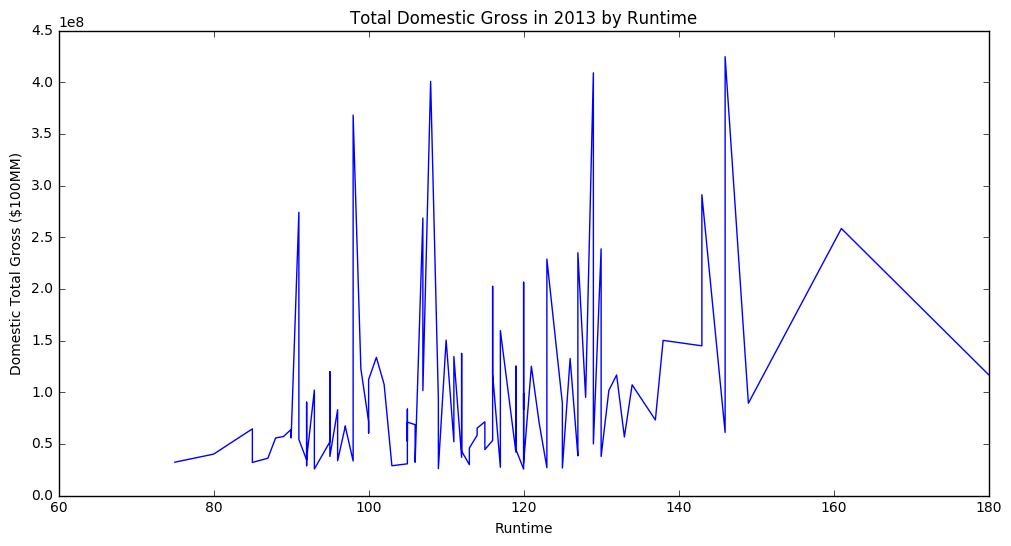

In [26]:
f = plt.figure(figsize=(12,6))

df = df.sort_values(by=['Runtime'])
plt.plot(df['Runtime'], df['DomesticTotalGross'])
plt.title('Total Domestic Gross in 2013 by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross ($100MM)')

### Exercise 3

- Group your data by Rating.
- Find the average runtime and domestic total gross at each level of Rating.

In [33]:
df_groupby_rating = df.groupby('Rating')
df_groupby_rating['Runtime'].mean()

Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64

In [34]:
df_groupby_rating['DomesticTotalGross'].mean()

Rating
G        268492764
PG       131135716
PG-13    111449769
R         69892429
Name: DomesticTotalGross, dtype: int64

### Exercise 4

- Plot Release Date by Domestic Total Gross. Segment by Rating.
- Have all 4 groups on one plot.
- Have 4 separate plots, but part of the same matplotlib figure.

/Users/mac/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


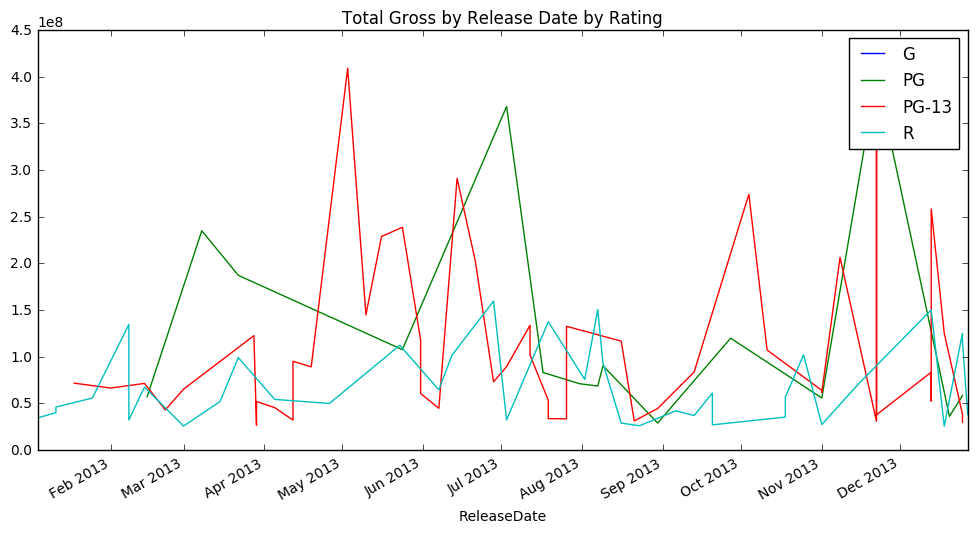

In [43]:
f = plt.figure(figsize=(12,6))
ax = plt.gca() # get current axes
rating_legend = ['G', 'PG', 'PG-13', 'R']
for rating, category in df_groupby_rating:
    category.plot(x='ReleaseDate', y='DomesticTotalGross', title='Total Gross by Release Date by Rating', ax=ax)

plt.legend(labels=rating_legend)


/Users/mac/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


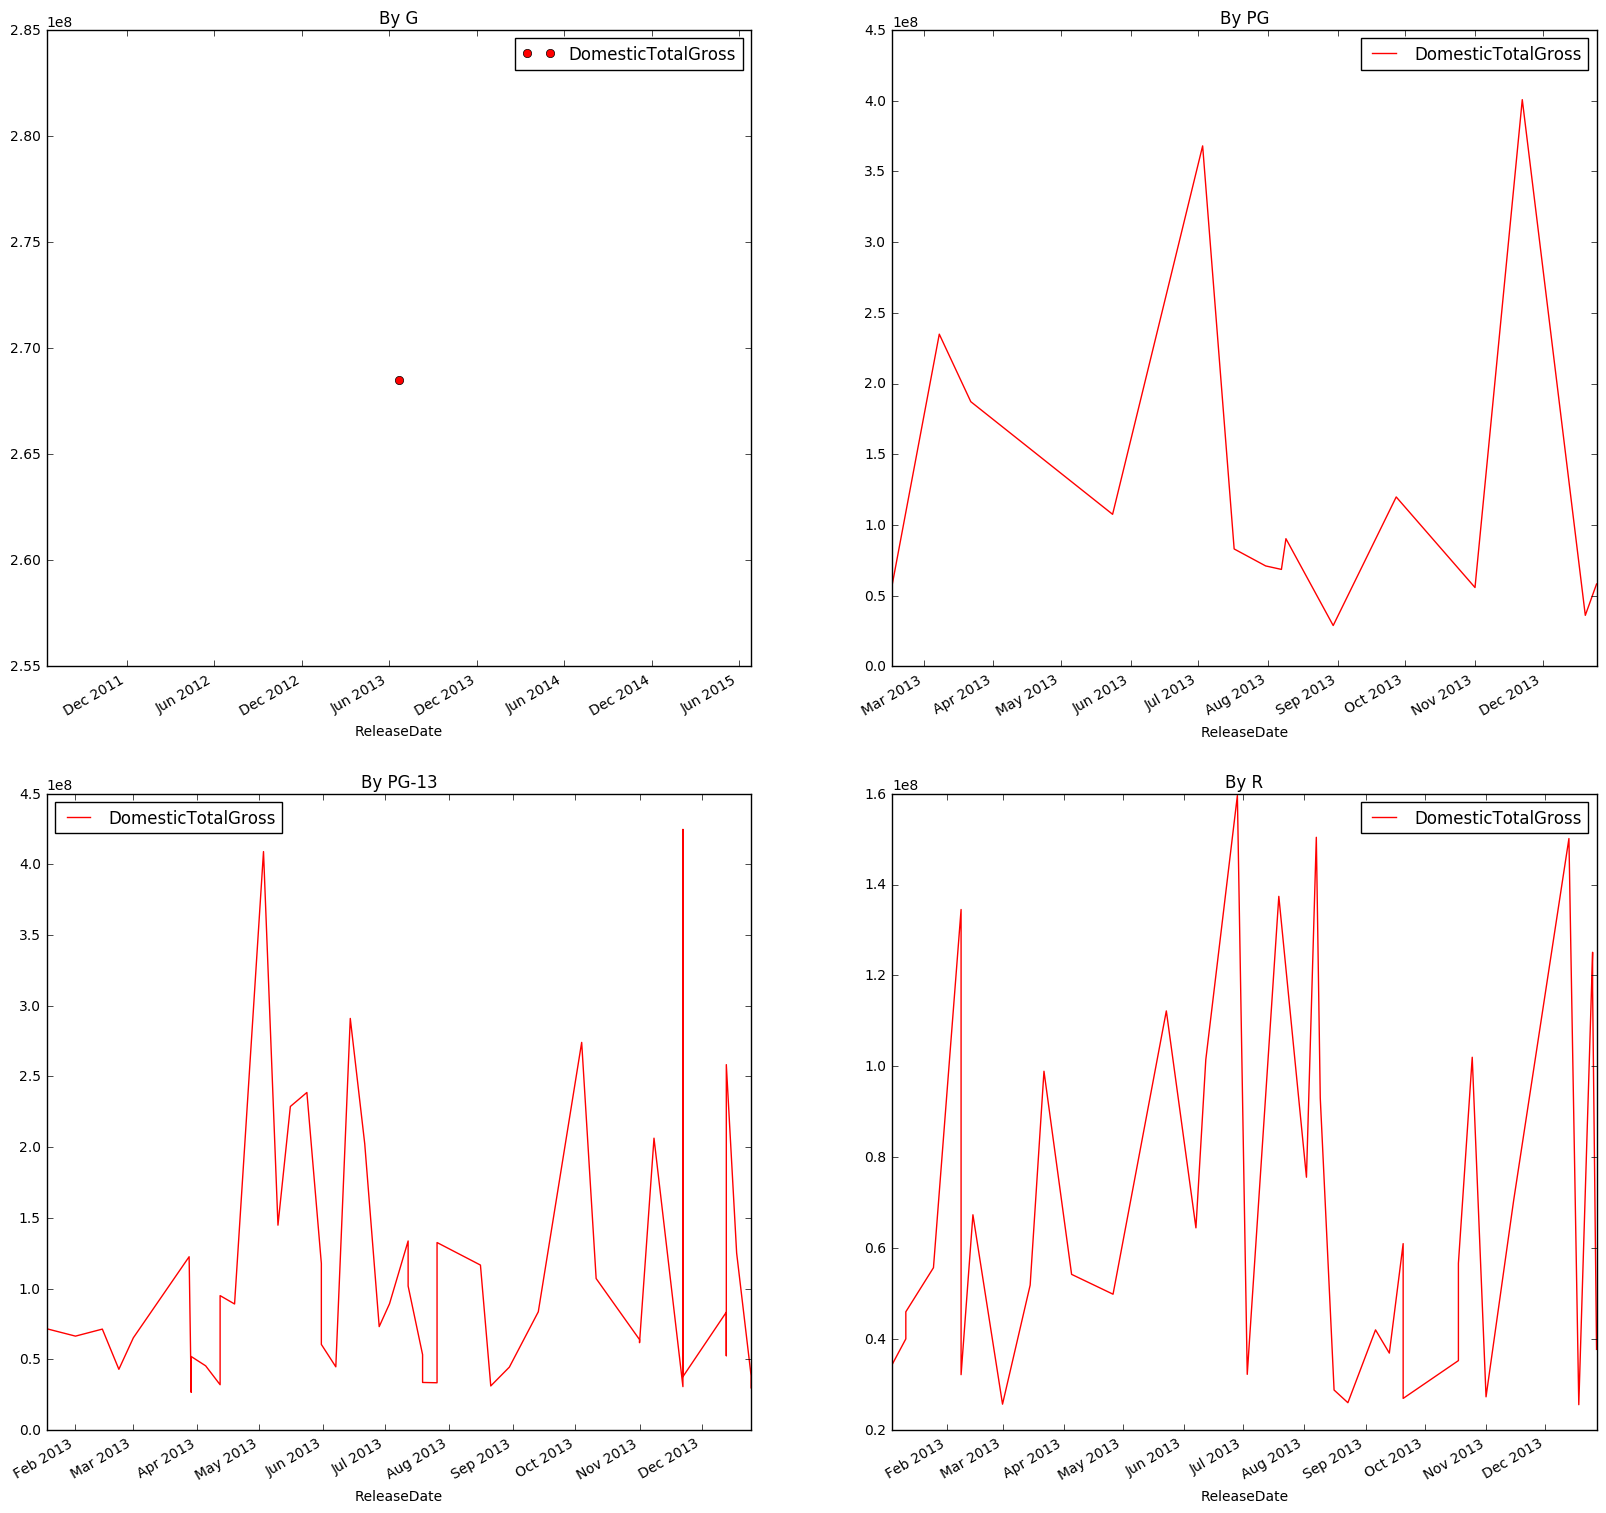

In [56]:
f = plt.figure(figsize=(20,20))
rating_legend = ['G', 'PG', 'PG-13', 'R']
for i, rating in enumerate(rating_legend):
    ax = plt.subplot(2, 2, i+1)
    if i == 0: 
        df[df['Rating'] == rating].plot(x='ReleaseDate',y='DomesticTotalGross',title='By ' + rating, ax=ax, style='ro')
    else:
        df[df['Rating'] == rating].plot(x='ReleaseDate',y='DomesticTotalGross',title='By ' + rating, ax=ax, color='r')
    
    





### Exercise 5

- What director in your dataset has the highest gross per movie (highest avg gross)?
- Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.

In [64]:
df_groupby_director = df.groupby('Director')
df_groupby_director['DomesticTotalGross'].mean().sort_values(ascending=False)

Director
Francis Lawrence              424668047
Shane Black                   409013994
Chris BuckJennifer Lee        400738009
Pierre CoffinChris Renaud     368061265
Zack Snyder                   291045518
Alfonso Cuaron                274092705
Dan Scanlon                   268492764
Peter Jackson                 258366855
Justin Lin                    238679850
Sam Raimi                     234911825
J.J. Abrams                   228778661
Alan Taylor                   206362140
Marc Forster                  202359711
Kirk De MiccoChris Sanders    187168425
Paul Feig                     159582188
Rawson Marshall Thurber       150394119
David O. Russell              150117807
Baz Luhrmann                  144840419
Seth Gordon                   134506920
Dennis Dugan                  133668525
James Mangold                 132556852
Adam McKay                    125168368
Peter Berg                    125095601
Jon Chu                       122523060
Louis Leterrier               1

In [113]:
df['freq'] = df.groupby('Director')['Director'].transform('count')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,freq
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03,NaN
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1.0
54,The Purge,3000000.0,64473115,James DeMonaco,R,85,2013-06-07,1.0
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12,2.0
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,1.0


In [110]:
director_greater_than_one = df[df['freq'] > 1].groupby('Director')['DomesticTotalGross'].mean()
director_greater_than_one

Director
James Wan         110493294
Malcolm D. Lee     51270491
Tyler Perry        52259354
Name: DomesticTotalGross, dtype: int64

### Exercise 6

- Bin the dataset into months and make a bar graph with error bars of gross each year

In [145]:
# extracting the month from release date
import calendar
df['MonthNumber'] = pd.DatetimeIndex(df['ReleaseDate']).month
df['Month'] = df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,freq,Month,MonthNumber
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03,NaN,Jul,7
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1.0,Jan,1
54,The Purge,3000000.0,64473115,James DeMonaco,R,85,2013-06-07,1.0,Jun,6
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12,2.0,Apr,4
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,1.0,Dec,12


In [146]:
df.sort_values('ReleaseDate')
group_by_month = df.groupby('MonthNumber')
month_means = group_by_month['DomesticTotalGross'].mean()
month_error = group_by_month['DomesticTotalGross'].std()

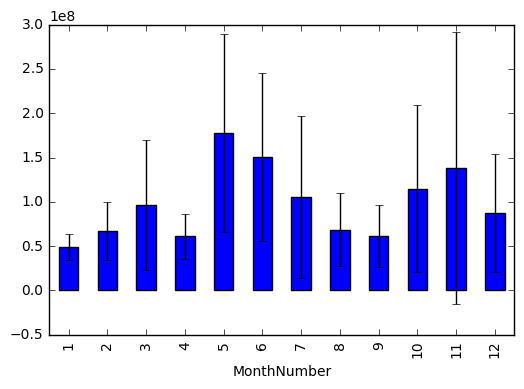

In [147]:
fig, ax = plt.subplots()

month_means.plot(yerr=month_error, ax=ax, kind='bar',sort_columns=True)